In [1]:
!pip install kneed

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Kneedle algorithm for elbow point detection
from kneed import KneeLocator

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  # True species labels for evaluation only

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
print("First 5 rows of the dataset:")
print(X.head())
print("\nDataset Description:")
print(X.describe())
print("\nCheck for Missing Values:")
print(X.isnull().sum())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.30

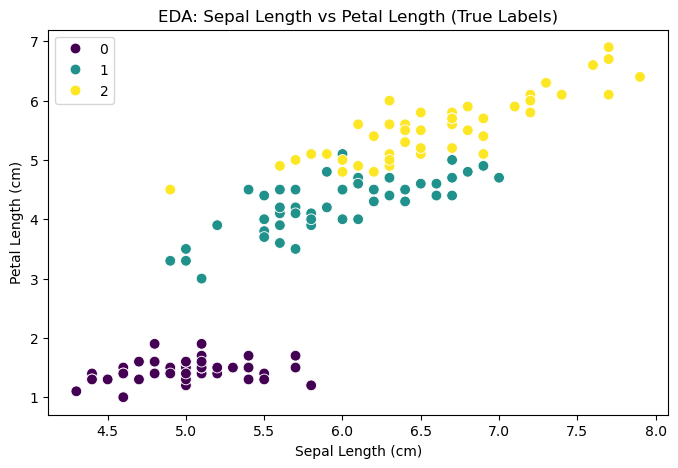

In [6]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['sepal length (cm)'], y=X['petal length (cm)'], hue=y_true, palette='viridis', s=60)
plt.title('EDA: Sepal Length vs Petal Length (True Labels)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [7]:
X_train, X_test, y_train_true, y_test_true = train_test_split(
    X, y_true, test_size=0.2, random_state=42, stratify=y_true
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Test set size: 30 samples


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
print("\nWCSS values for k=1 to 10 (Train Set):")
for k, w in zip(k_range, wcss):
    print(f"k={k}: WCSS={w:.4f}")


WCSS values for k=1 to 10 (Train Set):
k=1: WCSS=480.0000
k=2: WCSS=181.2279
k=3: WCSS=110.2823
k=4: WCSS=89.2690
k=5: WCSS=76.2891
k=6: WCSS=65.1993
k=7: WCSS=57.1759
k=8: WCSS=50.1260
k=9: WCSS=42.8981
k=10: WCSS=38.8477


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

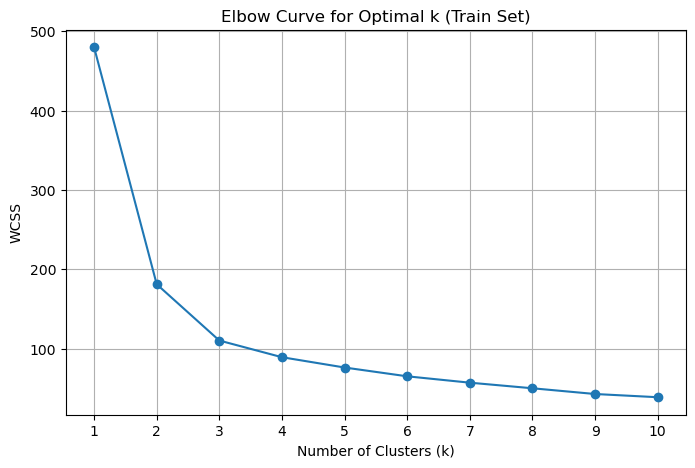

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Curve for Optimal k (Train Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [12]:

knee = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"\nOptimal number of clusters (Kneedle): {optimal_k}")


Optimal number of clusters (Kneedle): 3


In [13]:
silhouette_scores = []
for k in k_range[1:]:  # Start from k=2, as silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)
print("\nSilhouette scores for k=2 to 10 (Train Set):")
for k, s in zip(k_range[1:], silhouette_scores):
    print(f"k={k}: Silhouette Score={s:.4f}")


Silhouette scores for k=2 to 10 (Train Set):
k=2: Silhouette Score=0.5759
k=3: Silhouette Score=0.4845
k=4: Silhouette Score=0.4166
k=5: Silhouette Score=0.3284
k=6: Silhouette Score=0.3299
k=7: Silhouette Score=0.3381
k=8: Silhouette Score=0.3323
k=9: Silhouette Score=0.3509
k=10: Silhouette Score=0.3522


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

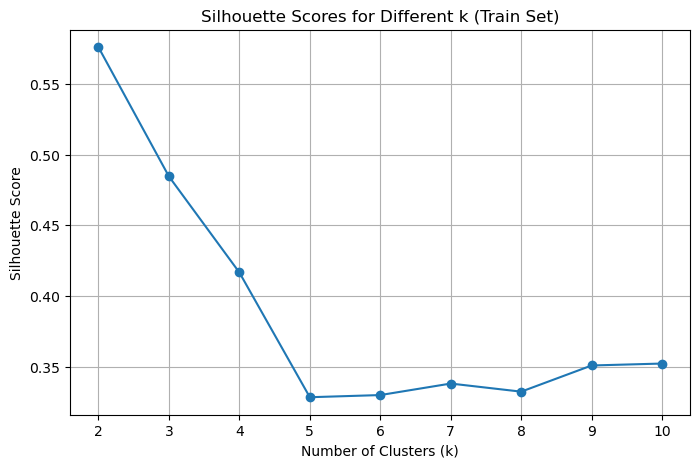

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k (Train Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range[1:])
plt.grid(True)
plt.show()

In [15]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_train_clusters = kmeans.fit_predict(X_train_scaled)
y_test_clusters = kmeans.predict(X_test_scaled)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
y_train_clusters

array([0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2,
       1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 2, 2, 0, 0, 0, 0, 1, 0], dtype=int32)

In [17]:
y_test_clusters

array([0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 0], dtype=int32)

In [18]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [19]:
X_train_pca

array([[-2.35430673, -1.03369922],
       [ 0.32811646, -1.48461375],
       [ 1.2290844 , -0.08852476],
       [-2.19452009, -0.41449679],
       [ 0.24248823, -1.27773347],
       [ 1.52294955, -0.87749328],
       [ 0.25815436, -0.81456565],
       [ 1.08813566, -0.28307828],
       [ 2.7816565 ,  0.80260248],
       [ 2.45214546,  2.47719638],
       [ 2.73500972,  0.75120347],
       [ 0.64451798, -0.20768998],
       [-0.17735004, -2.56577792],
       [ 0.12752389, -0.75913868],
       [ 0.30008117, -0.95247461],
       [-2.26948632, -0.27811494],
       [-2.31638839,  1.1510026 ],
       [ 1.96442486, -0.70771473],
       [ 1.33662596,  0.41860613],
       [-1.82655915,  0.44737164],
       [ 1.19203651, -0.91394324],
       [-2.35781737,  1.14379899],
       [ 2.32990455,  2.53829986],
       [-1.96744528, -0.57193611],
       [-0.02337536, -1.51777717],
       [ 1.4200781 , -0.03998037],
       [ 1.57165511, -0.41279836],
       [-2.04514806,  0.28260631],
       [ 0.95404926,

In [20]:
X_test_pca

array([[-2.44400605, -0.82595607],
       [ 1.00632807,  0.07545393],
       [-0.53297555, -1.77332424],
       [-0.41340857, -1.94102138],
       [-2.55732584, -0.40741558],
       [ 0.74714689,  0.76589526],
       [-2.75726953,  0.50823033],
       [-1.90941712,  0.43296443],
       [ 1.50601148,  0.2637891 ],
       [ 0.21041559, -0.24785839],
       [ 2.28042489,  0.38644044],
       [ 1.89134571,  0.66401682],
       [ 1.85318483,  0.29041315],
       [ 0.72616662,  0.5864132 ],
       [-2.22712429,  0.26361778],
       [-2.20350382,  0.05282043],
       [-2.16294528,  1.84724283],
       [ 0.12341908, -1.25514889],
       [ 0.6990355 , -0.17179338],
       [ 0.91038157,  0.03235372],
       [-2.14547565,  1.05772096],
       [ 2.00519706,  0.59723684],
       [ 0.90606309,  0.02581435],
       [ 1.16637   , -0.78586019],
       [ 1.8375187 , -0.17275466],
       [ 1.34234159,  0.31768897],
       [ 0.85779275,  0.2407611 ],
       [-1.87286705,  1.40349546],
       [ 1.45619294,

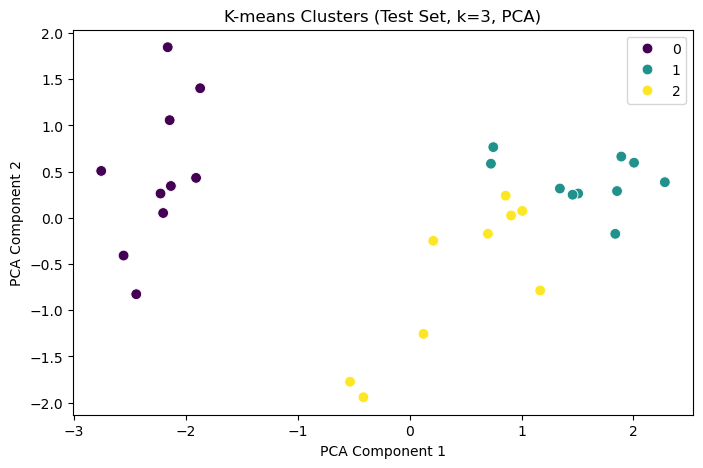

In [21]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test_clusters, palette='viridis', s=60)
plt.title(f'K-means Clusters (Test Set, k={optimal_k}, PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()